In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()
data = iris['data']

# Standard Scaler

In [19]:
ex = StandardScaler()

In [20]:
data_transformed = ex.fit_transform(data)

# Dimensionality Reduction using PCA

In [21]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_transformed)
principalDF = pd.DataFrame(principalComponents, columns=['principal component 1', 'principal component 2'])
principalDF.head()

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


# Visualizing the dataset before forming the clusters

Text(0.5, 1.0, 'Data Before Clusters')

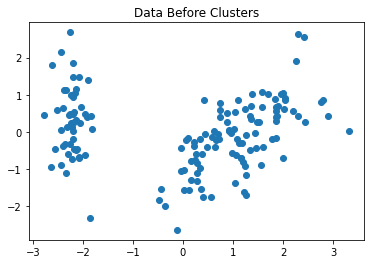

In [22]:
X = principalDF.values
plt.scatter(X[:,0], X[:,1])
plt.title('Data Before Clusters')

# Identifying the # of clusters using the 'elbow' method

In [23]:
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=123)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

In [24]:
WCSS

[574.8792432000107,
 197.40381604541295,
 115.02075663594019,
 89.34762085165664,
 66.19908156304935,
 57.0703387639304,
 47.83321231591932,
 39.458117039759465,
 33.00320157951463,
 28.382083050933105]

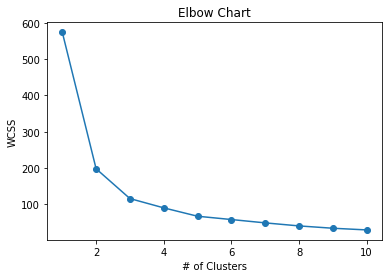

In [25]:
plt.plot(range(1, 11), WCSS, marker='o')
plt.title('Elbow Chart')
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# Optimal number of clusters
kl = KneeLocator(range(1, 11), WCSS, curve="convex", direction="decreasing")
kl.elbow

3

# K-Means with 3 clusters

In [27]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=123)
#predict the labels of clusters.
label = kmeans.fit_predict(X)

# Visualizing the data after applying the clusters

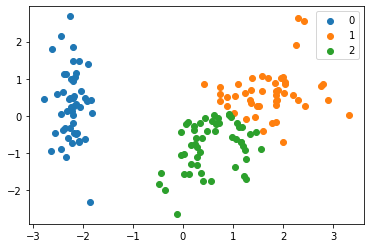

In [28]:
# Getting unique labels
u_labels = np.unique(label)
 
# Plotting the results:
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.legend()
plt.show()

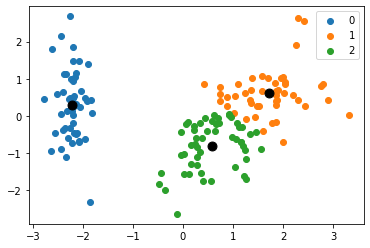

In [29]:
# Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
# Plotting the results: 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

# Model Evaluation - Silhouette score

In [32]:
silhouette_score(data, kmeans.labels_, metric='euclidean')

0.5061527484935536